In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df_copy = pd.read_csv('Titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Catogorical Columns

- Survived
- PClass
- Sex
- SipSp
- Parch
- Embarked

# Numerical Columns

- Age
- Fare
- PassangerId

# Mixed Columns

- Name
- Tickets
- Cabin

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# few Conclutions
# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [9]:
# Dropping the Cabin Column
df.drop(columns=['Cabin'], inplace = True)

In [10]:
# Imputing Missing values for embarked
# finding the most appeared value in embarked column

df['Embarked'].value_counts()
df['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [11]:
# S it is


df['Embarked'].fillna('S', inplace = True)
df['SibSp'].fillna(0, inplace = True)
df['Age'].fillna(22, inplace = True)

In [12]:
# wants to check one more thing...
# should I change the SipSp and Parch to category

df['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [13]:
df['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

# Changing data types for the following cols

- Survived, PClass, Sex, Age, Embarked

In [14]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
# df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         417 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 25.1+ KB


In [16]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,28.570574,0.447368,0.392344,35.627188
std,120.810458,13.070635,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


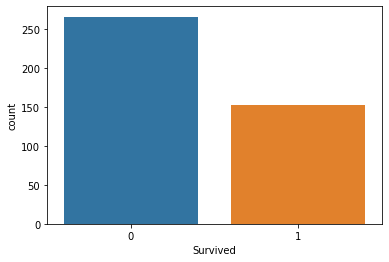

Out of 418, %64 people died in the accident


In [17]:
# Univariate Analysis 

# Let's start with the Survived col
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Survived'])
plt.show()

death_percent = round((df['Survived'].value_counts().values[0]/418)*100)

print('Out of 418, %{} people died in the accident'.format(death_percent))

3    52.153110
1    25.598086
2    22.248804
Name: Pclass, dtype: float64


C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

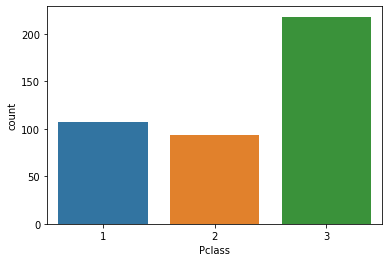

In [18]:
# Pclass columns

print((df['Pclass'].value_counts()/418)*100)

sns.countplot(df['Pclass'])

# Conclusion: Pclass was the most crowded class

male      63.636364
female    36.363636
Name: Sex, dtype: float64


C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

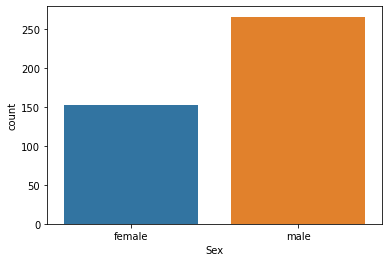

In [19]:
print((df['Sex'].value_counts()/418)*100)

sns.countplot(df['Sex'])

0    67.703349
1    26.315789
2     3.349282
3     0.956938
4     0.956938
8     0.478469
5     0.239234
Name: SibSp, dtype: float64


C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

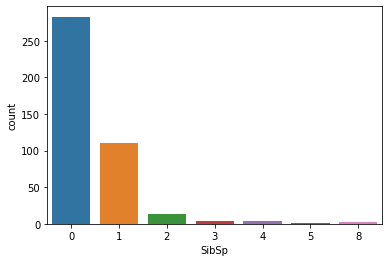

In [20]:
print((df['SibSp'].value_counts()/418)*100)

sns.countplot(df['SibSp'])

0    77.511962
1    12.440191
2     7.894737
3     0.717703
4     0.478469
9     0.478469
6     0.239234
5     0.239234
Name: Parch, dtype: float64


C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

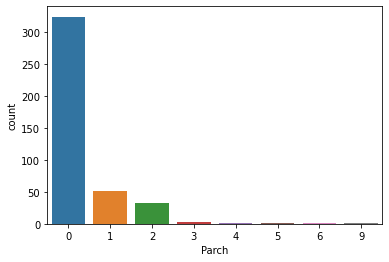

In [21]:
print((df['Parch'].value_counts()/418)*100)

sns.countplot(df['Parch'])

S    64.593301
C    24.401914
Q    11.004785
Name: Embarked, dtype: float64


C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

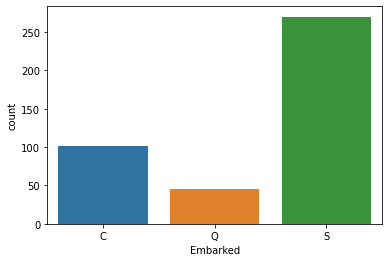

In [22]:
print((df['Embarked'].value_counts()/418)*100)

sns.countplot(df['Embarked'])

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness of Age graph 0.8052978240318668
Kurt of the Age Graph 0.741102548961575


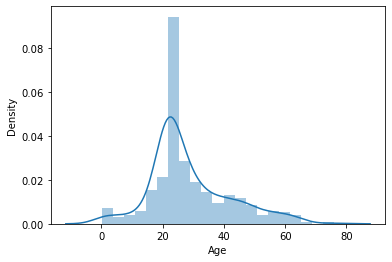

In [23]:
# Age column

sns.distplot(df['Age'])

print('Skewness of Age graph', df['Age'].skew())

print('Kurt of the Age Graph', df['Age'].kurt())

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

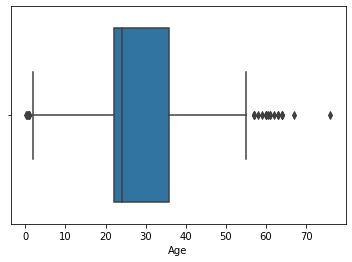

In [24]:
sns.boxplot(df['Age'])

In [25]:
print('People withh age in between 60 and 70 are', df[(df['Age'] > 60) & (df['Age'] < 70)].shape[0])
print('People withh age in between 70 and 75 are', df[(df['Age'] >= 70) & (df['Age'] <= 75)].shape[0])
print('People withh age in grater the 75 are', df[df['Age'] > 75].shape[0])

print('-'*50)
print('People with age between 0 and 1', df[df['Age'] < 1].shape[0])

People withh age in between 60 and 70 are 10
People withh age in between 70 and 75 are 0
People withh age in grater the 75 are 1
--------------------------------------------------
People with age between 0 and 1 5


## Conclution

- For all preactical purposes age can be considered as normal distribution
- Deeper analysis is required for outliar detection

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness of Fare graph 3.6872133081121405
Kurt of the Fare Graph 17.92159525773599


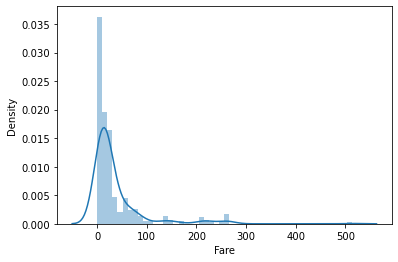

In [26]:
sns.distplot(df['Fare'])

print('Skewness of Fare graph', df['Fare'].skew())

print('Kurt of the Fare Graph', df['Fare'].kurt())

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

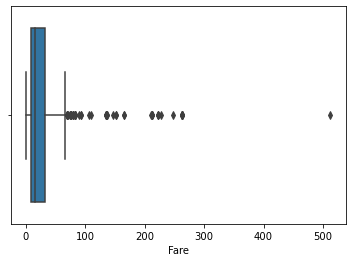

In [27]:
sns.boxplot(df['Fare'])

In [28]:
print('People withh Fare in between $200 and $300 are', df[(df['Fare'] >= 200) & (df['Age'] <= 300)].shape[0])
print('People withh Fare greater then $300', df[df['Fare'] >= 300].shape[0])

People withh Fare in between $200 and $300 are 18
People withh Fare greater then $300 1


## Conclusion

- Highly skewed data, a lot of people had cheaper tickets
- Outliars are there in the data

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,53.3,46.7
2,67.7,32.3
3,67.0,33.0


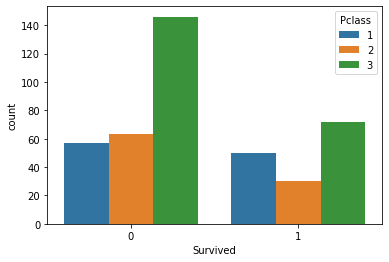

In [29]:
# Multivariate analysis
# Survival with Pclass

sns.countplot(df['Survived'], hue = df['Pclass'])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis = 1)

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Sex,,
female,0.0,100.0
male,100.0,0.0


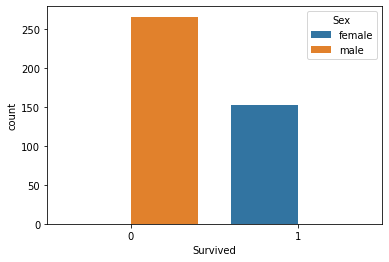

In [30]:
sns.countplot(df['Survived'], hue = df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis = 1)

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Embarked,,
C,60.8,39.2
Q,47.8,52.2
S,67.4,32.6


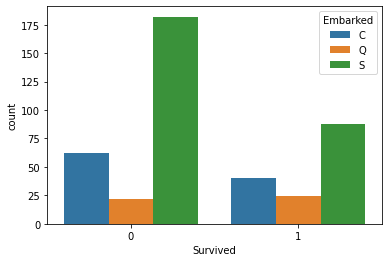

In [31]:
sns.countplot(df['Survived'], hue = df['Embarked'])
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis = 1)

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

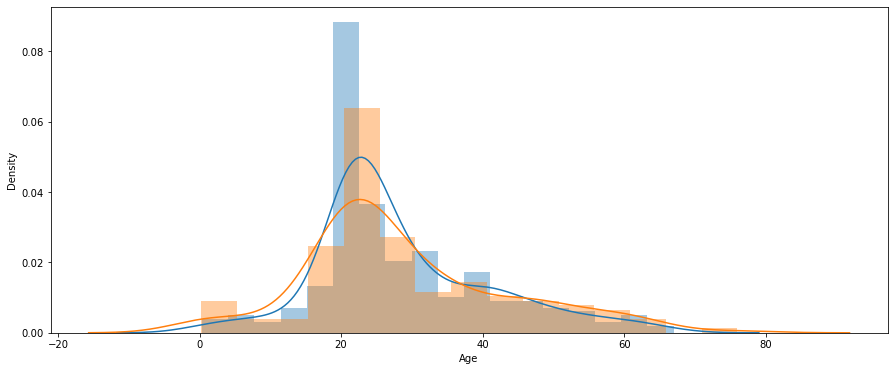

In [32]:
# Survived with Age

plt.figure(figsize = (15,6))
sns.distplot(df[df['Survived'] == 0]['Age'])
sns.distplot(df[df['Survived'] == 1]['Age'])

C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Smit Raval\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

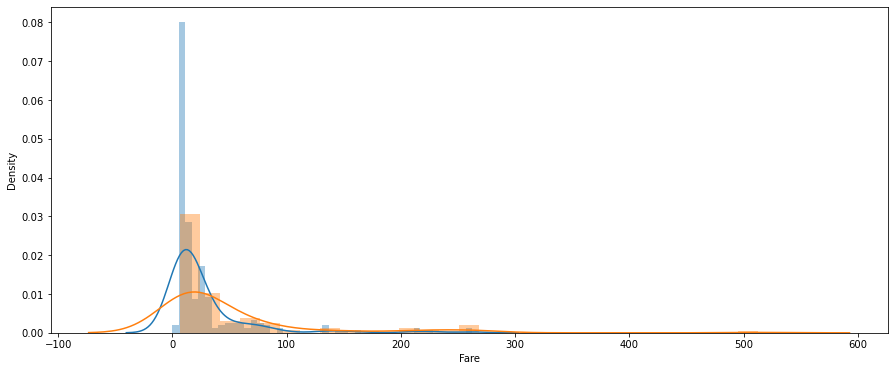

In [33]:
plt.figure(figsize = (15,6))
sns.distplot(df[df['Survived'] == 0]['Fare'])
sns.distplot(df[df['Survived'] == 1]['Fare'])

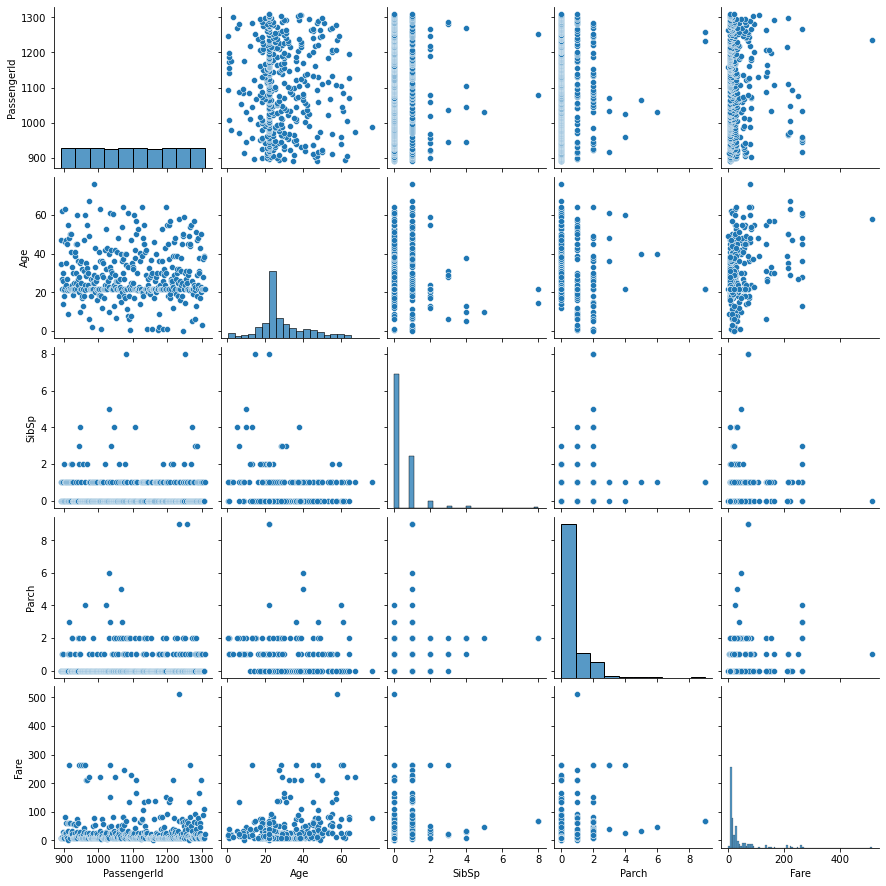

In [34]:
sns.pairplot(df)

<AxesSubplot:>

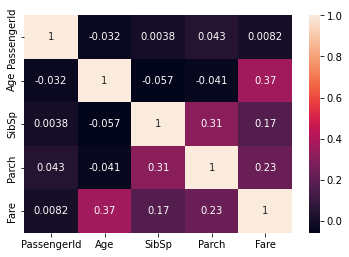

In [35]:
sns.heatmap(df.corr(), annot = True)

In [36]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size'] = df['Parch'] + df['SibSp']
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
254,1146,0,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,S,0
311,1203,0,3,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,C,0
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,C,0
68,960,0,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C,0
93,985,0,3,"Guest, Mr. Robert",male,22.0,0,0,376563,8.0500,S,0


In [37]:
def f_type(number):
    if number == 0:
        return 'Alone'
    elif number > 0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'
        
df['family_type'] = df['family_size'].apply(f_type)

In [38]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
316,1208,0,1,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,C,1,Medium
348,1240,0,2,"Giles, Mr. Ralph",male,24.0,0,0,248726,13.5000,S,0,Alone
212,1104,0,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,S,0,Alone
112,1004,1,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,C,0,Alone
269,1161,0,3,"Pokrnic, Mr. Mate",male,17.0,0,0,315095,8.6625,S,0,Alone


In [39]:
# Dropping SibSp, Parch and Family_size cols
df.drop(columns=['SibSp', 'Parch', 'family_size'], inplace = True)

In [40]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,22.0,CA. 2343,69.55,S,Large


In [41]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis = 1)

Survived,0,1
family_type,,
Alone,73.1,26.9
Large,53.8,46.2
Medium,48.7,51.3


## Detecting the Outliars

##### Numerical Data
- if the Data is following normal distribuution, anything beyond 3SD - mean + 3SD can be considered as outliar
- if the Data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5iqr and Q3 + 1.5iqr 

##### Categorical Data
- if the col is highly inbalance for eg male 10000 and female 2 then we can eliminate female

In [42]:
df = df[df['Age']< (df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(417, 10)

In [43]:
# handling outliars from Fare column

# Finding quartiles

Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)
outliar_low = Q1 - 1.5 * (Q3 - Q1)
outliar_high = Q3 + 1.5 * (Q3 - Q1)

# df = df[(df['Fare'] > outliar_low) & (df['Fare'] < outliar_high)]

In [44]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
257,1149,0,3,"Niklasson, Mr. Samuel",male,28.0,363611,8.05,S,Alone


In [45]:
pd.get_dummies(data = df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first = True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,892,0,"Kelly, Mr. James",34.5,330911,7.8292,0,1,1,1,0,0,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,1,0,0,1,0,1
2,894,0,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,0,1,1,0,0,0
3,895,0,"Wirz, Mr. Albert",27.0,315154,8.6625,0,1,1,0,1,0,0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",22.0,A.5. 3236,8.0500,0,1,1,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,PC 17758,108.9000,0,0,0,0,0,0,0
415,1307,0,"Saether, Mr. Simon Sivertsen",38.5,SOTON/O.Q. 3101262,7.2500,0,1,1,0,1,0,0
416,1308,0,"Ware, Mr. Frederick",22.0,359309,8.0500,0,1,1,0,1,0,0


In [46]:
df = pd.get_dummies(data = df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first = True)

In [47]:
df.sample(4)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
61,953,0,"McCrae, Mr. Arthur Gordon",32.0,237216,13.5000,1,0,1,0,1,0,0
271,1163,0,"Fox, Mr. Patrick",22.0,368573,7.7500,0,1,1,1,0,0,0
39,931,0,"Hee, Mr. Ling",22.0,1601,56.4958,0,1,1,0,1,0,0
68,960,0,"Tucker, Mr. Gilbert Milligan Jr",31.0,2543,28.5375,0,0,1,0,0,0,0


<AxesSubplot:>

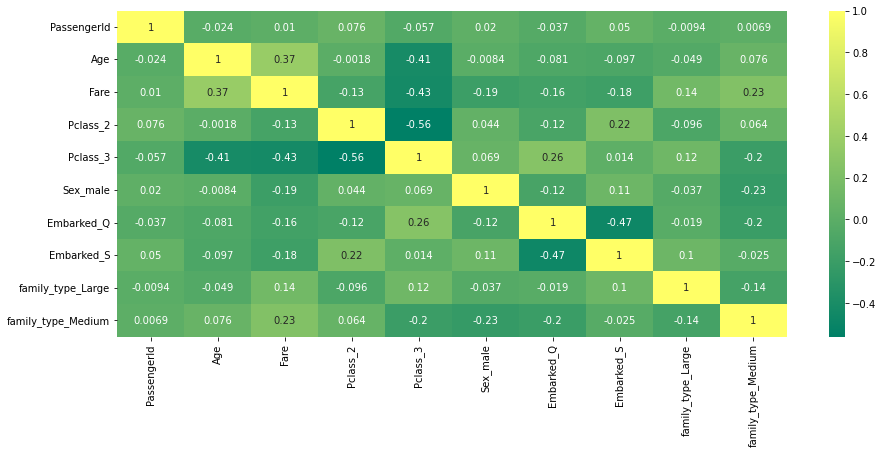

In [48]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), cmap = 'summer',annot = True)

## Conclusion

- Chance of female survival is higher then male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people in going to C survived more
- people in the age range of 20 to 40 had a higher chance of not surviving
- people travelling with smaller families has higher chance of the surviving the accident in comparison to people with large families and travelling alone...